# Klasifikatoriai - Atsakymas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://www.indushealthplus.com/media/article_img/heart-attack-facts-awareness-thumb.jpg)

# Užduotis

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):
* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
* paruoškite duomenis modelio apmokymui
* apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite *confusion* matricas.
* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite *confusion* matricą.
* kuris modelis efektyviausias? Palyginkite *confusion* matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Stulpelių paaiškinimai anglų kalba:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

*dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)*

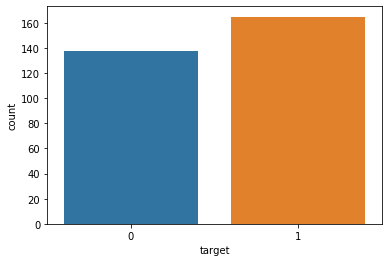

In [5]:
sns.countplot(heart['target'])

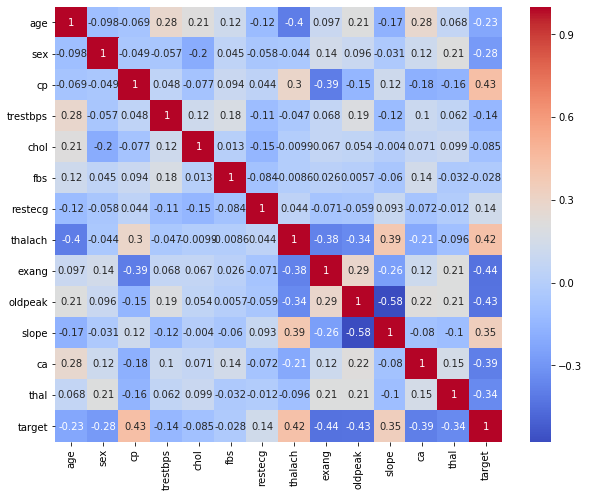

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
mtx = sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

Įdomu tai, kad su target reikšme labiausiai koreliuoja fizinio krūvio metu nustatomi rodikliai. O kraujo spaudimas ir cholesterolis koreliuoja labai menkai. Palyginti, nemažai įtakos turi amžius ir lytis.

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


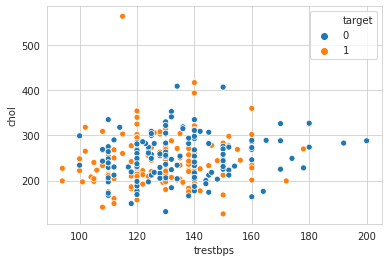

In [8]:
sns.set_style('whitegrid')
sns.scatterplot('trestbps', 'chol', data=heart, hue='target')

Deja, sunkiai pavyksta atspausdinti kažką, kas rodytų didesnius kontrastus. Pamėginkime .pairplot() su išmestomis kategorinėmis reikšmėmis:

/home/robotautas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/robotautas/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


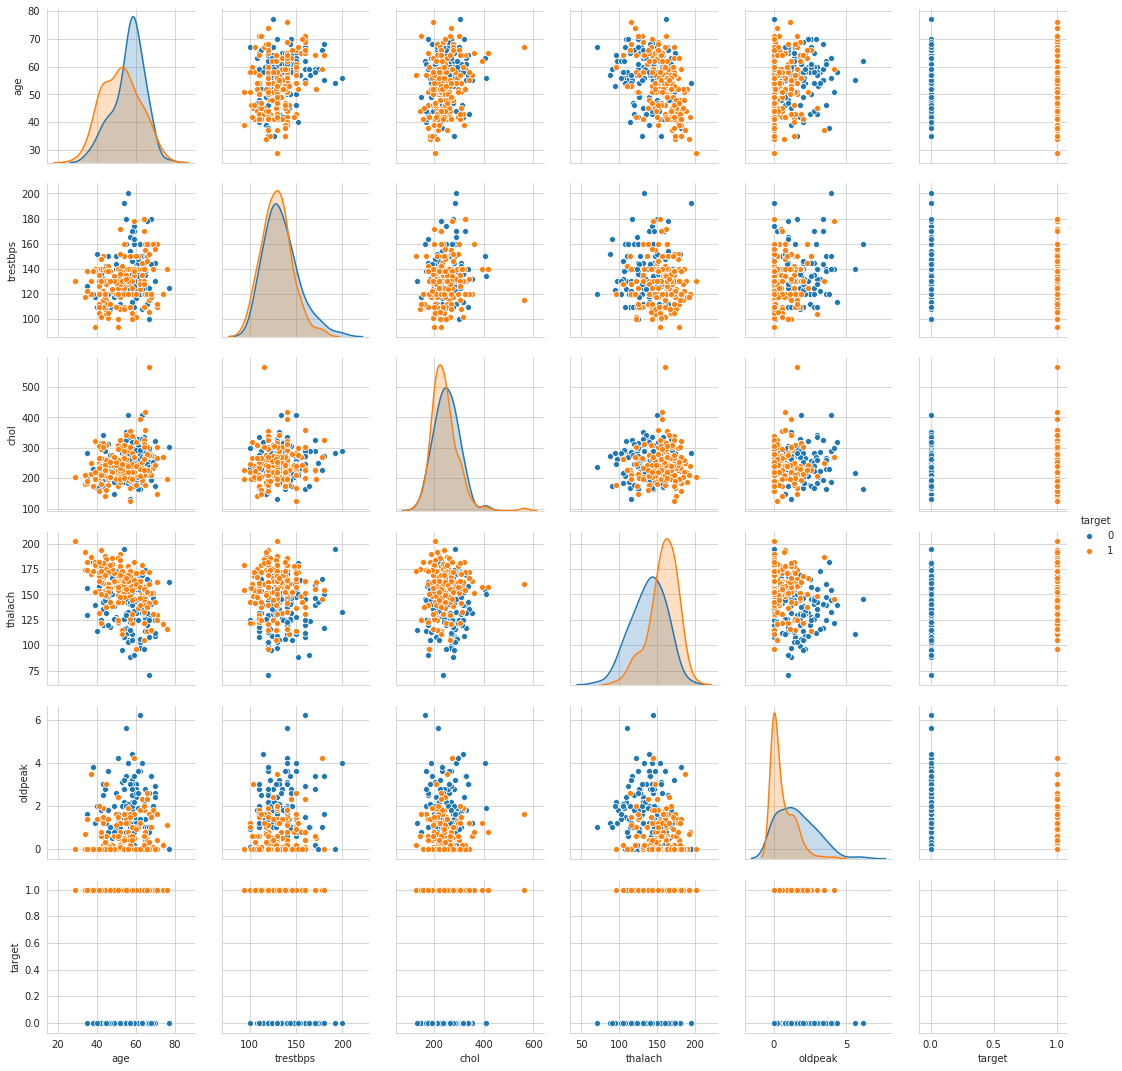

In [9]:
sns.pairplot(heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue='target')

Panašu, kad target reikšmės tam tikrose porose grupuojasi, galime tikėtis neblogų modelių efektyvumų.

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


išrinksime kategorines reikšmes, kurios turi daugiau negu 2 reikšmes, sukursime *dummies*

In [12]:
heart['cp'].unique()

array([3, 2, 1, 0])

In [13]:
heart['slope'].unique()

array([0, 2, 1])

In [14]:
heart['ca'].unique()

array([0, 2, 1, 3, 4])

In [15]:
heart['thal'].unique()

array([1, 2, 3, 0])

In [16]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0', 'slope1', 'slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [17]:
dummies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dummies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


dummies sukurti, dabar jungsime su pagrindine lentele

In [18]:
heart.drop(columns = ['ca', 'cp', 'slope', 'thal'], inplace=True)
df = pd.concat([heart, dummies], axis=1)

In [19]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,1,0,0,1,0


atskirsime target stulpelį:

In [20]:
X = df.drop('target', axis=1)

In [21]:
X.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,1,0,0,1,0


In [24]:
y = df['target']

In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

viskas, toliau galime copy-paste daryti iš paskaitos:)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, y_train)

/home/robotautas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
model.score(X_train, y_train)

0.8729281767955801

In [69]:
lr_preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_preds)
lr_cm

array([[44,  8],
       [ 6, 64]])

Pažaiskime su parametrais. Perspėjimo žinutėje nurodyta, kad solver parametras automatiškai nustatomas 'lbfgs'. Paskaitę dokumentaciją galime išsiaiškinti, kokie yra galimi variantai. 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs'. Pasibandykime su visais.

In [70]:
from sklearn.linear_model import LogisticRegression
model_newton_cg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

In [71]:
lr_newton_preds = model_newton_cg.predict(X_test)
from sklearn.metrics import confusion_matrix
lr_newton_cm = confusion_matrix(y_test, lr_newton_preds)
lr_newton_cm

array([[44,  8],
       [ 5, 65]])

Viena diagnoze tiksliau! Galbūt išgelbėjome gyvybę :)

# Decision Trees

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.7459016393442623

In [74]:
dtc_preds = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test, dtc_preds)
dtc_cm

array([[39, 13],
       [18, 52]])

# Random Forests:

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 5000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8360655737704918

bežaidžiant su miškų kiekiu, aiškėja, kad kompiuteris susitvarko nesunkiai, tad paieškokim optimalios vertės:

In [202]:
def optimal_estimators(state, est):
    list_of_dicts = []
    for s in range(state):
        index_value_pairs = {}
        for i in range(est):
            rfc = RandomForestClassifier(n_estimators = i+1, random_state= s+1).fit(X_train, y_train)
            index_value_pairs.update({f'estimators{i+1}':rfc.score(X_test, y_test)})
        list_of_dicts.append(index_value_pairs)
    return list_of_dicts

        

Parašėme funkciją, kuri praleidžia per ciklus nurodytą skaičių state, ir estimators parametrų. *State* reikalingas tam, kad fiksuotų *random forest* atsitiktinių reikšmių generatoriaus statusą. Tokiu būdu, apmokius modelį iš naujo, turėsime tas pačias reikšmes.

In [245]:
opt = optimal_estimators(100, 100) # ilgai užtruks, gali iki ~10min.


Sudėkime gautą sąrašą iš žodynų į DataFrame.

In [275]:
best_values = pd.DataFrame(opt).T
best_values.columns = columns = list(range(1, len(opt)+1))
best_values.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
estimators1,0.754098,0.778689,0.754098,0.803279,0.737705,0.770492,0.729508,0.729508,0.696721,0.786885,...,0.737705,0.729508,0.704918,0.786885,0.737705,0.786885,0.786885,0.721311,0.762295,0.729508
estimators10,0.778689,0.811475,0.786885,0.844262,0.844262,0.803279,0.811475,0.786885,0.795082,0.811475,...,0.811475,0.844262,0.803279,0.827869,0.770492,0.836066,0.811475,0.844262,0.819672,0.836066
estimators100,0.827869,0.827869,0.852459,0.819672,0.836066,0.827869,0.852459,0.836066,0.819672,0.827869,...,0.844262,0.836066,0.827869,0.836066,0.803279,0.860656,0.827869,0.836066,0.827869,0.836066
estimators11,0.778689,0.836066,0.836066,0.827869,0.852459,0.836066,0.795082,0.811475,0.811475,0.819672,...,0.827869,0.844262,0.811475,0.844262,0.811475,0.836066,0.819672,0.852459,0.819672,0.836066
estimators12,0.786885,0.827869,0.819672,0.827869,0.852459,0.803279,0.795082,0.803279,0.795082,0.819672,...,0.827869,0.836066,0.827869,0.844262,0.803279,0.852459,0.827869,0.868852,0.811475,0.844262


Turime lentelę su 10000 reikšmių.

In [276]:
best_values.max().idxmax() # sužinome stulpelio nr. Tai mūsų *random_state* parametras.

35

In [282]:
best_values.idxmax()[35] #sužinome savo estimators parametrą

'estimators11'

In [290]:
from sklearn.ensemble import RandomForestClassifier
rfc_optimized = RandomForestClassifier(n_estimators = 11, random_state=35).fit(X_train, y_train)
rfc_optimized.score(X_test, y_test)

0.8852459016393442

In [292]:
rfc_preds = rfc_optimized.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_preds)
rfc_cm

array([[46,  6],
       [ 8, 62]])

In [293]:
y_test.value_counts()

1    70
0    52
Name: target, dtype: int64

Nors algoritmas save vertina geriau už kitus, pasitikrinus y_test reikšmes ir pažiūrėję į *confusion* matricą, matome, kad net 8 ligonius neteisingai nustatė kaip sveikus. 

# KNearest Neighbors

pradėsime nuo duomenų paruošimo KNN klasifikatoriui. Turime per scaler'į praleisti viską, išskyrus 'target stulpelį'. Tuomet pakeistas reikšmes ir target stulpelį paduoti į train_test_split. Target stulpelį turime jau gatavą. O modifikuosime tą dalį, kuri dabar *X* kintamąjame.

In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) # sukuriame StandardScaler objektą
scaled_features = scaler.transform(X) # perdarome reikšmes į KNN klasifikatoriui priimtinesnį formatą
scaled_features[:4]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422, -0.63464776,  3.4891135 ,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391,  3.97911213, -1.10076284, -0.79311554],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422,  1.57567719, -0.28660575,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391, -0.25131234,  0.9084609 , -0.79311554],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
         2.24944438, -0.63464776, -0.28660575, -0

In [295]:
features = pd.DataFrame(scaled_features, columns=X.columns)

In [371]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
age         303 non-null float64
sex         303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
ca0         303 non-null float64
ca1         303 non-null float64
ca2         303 non-null float64
ca3         303 non-null float64
ca4         303 non-null float64
cp0         303 non-null float64
cp1         303 non-null float64
cp2         303 non-null float64
cp3         303 non-null float64
slope0      303 non-null float64
slope1      303 non-null float64
slope2      303 non-null float64
thal0       303 non-null float64
thal1       303 non-null float64
thal2       303 non-null float64
thal3       303 non-null float64
dtypes: float64(25)
memory usage: 59.3 KB


In [400]:
from sklearn.neighbors import KNeighborsClassifier
XX_train, XX_test, yy_train, yy_test = \
train_test_split(features, y, test_size=0.4, random_state=42)
heart_knc = KNeighborsClassifier(n_neighbors = 103).fit(XX_train, yy_train)
heart_knc.score(XX_test, yy_test)

0.8934426229508197

In [398]:
knc_preds = heart_knc.predict(XX_test)
knc_cm = confusion_matrix(yy_test, knc_preds)
knc_cm

array([[42, 10],
       [ 3, 67]])

### kaip ieškojau optimalių neghbors reikšmių...

In [389]:
def find_optimal(neighbors):
    score_dict = {}
    for i in range(neighbors):
        knc_optimized = KNeighborsClassifier(n_neighbors = i+1).fit(XX_train, yy_train)
        score_dict.update({i+1:knc_optimized.score(XX_test, yy_test)})
    return score_dict

In [390]:
neighbors_dict = find_optimal(132)
max_sample = max(neighbors_dict, key=neighbors_dict.get)
max_sample

101

In [392]:
neighbors_dict[101]

0.8934426229508197

In [394]:
indexes = []
for k, v in neighbors_dict.items():
    if v == 0.8934426229508197:
        indexes.append(k)
indexes

[101, 103]

# Išvados

Geriausiai pasirodė KNN modelis, jo įvertinimas aukščiausias, ir *false negative* (kai spėjimas = 0, o tikrovė = 1) šūvių mažiausiai iš visų bandytų, tik 3. Antroje vietoje logistinė regresija, nors ir mažiau efektyvumo balų surinko už Random forests, bet *false-negative* pataikymų 5 iš 70. Trečioje vietoje RandomForests, nors ir daugiau efektyvumo balų, bet sėkmingiau spėliojo sveikus pacientus, kas ligos diagnozėje nėra labai gerai:). Taip pat jis surijo nemažai laiko, kol 10000 kartų prasiiteravo beieškant geriausių parametrų. Na o DecisionTree kaip ir kalbėta paskaitoje nėra labai efektyvus modelis. Tai tiek, ačiū :) 